In [52]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import datetime
from sqlalchemy import create_engine

Load Data into Pandas Dataframe called df
Then cleanup column names by stripping any leading or trailing spaces. 

In [54]:

engine = create_engine("sqlite:////Users/archana/Desktop/MEtis/Project_Database/mta_data.db")

df = pd.read_sql('SELECT * FROM mta_data;',engine)
df.head()

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,03:00:00,REGULAR,7680606,2656954
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,07:00:00,REGULAR,7680608,2656967
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,11:00:00,REGULAR,7680620,2657068
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,15:00:00,REGULAR,7680671,2657118
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,19:00:00,REGULAR,7680734,2657163


In [55]:
df.columns

Index(['C/A', 'UNIT', 'SCP', 'STATION', 'LINENAME', 'DIVISION', 'DATE', 'TIME',
       'DESC', 'ENTRIES', 'EXITS'],
      dtype='object')

In [56]:
df.columns = [column.strip() for column in df.columns]  
df.dtypes
    

C/A         object
UNIT        object
SCP         object
STATION     object
LINENAME    object
DIVISION    object
DATE        object
TIME        object
DESC        object
ENTRIES      int64
EXITS        int64
dtype: object

Rename column C/A to CA

In [57]:
df.rename(columns = {'C/A':'CA'}, inplace = True)

combine DATE and TIME columns and call is DATETIME of the format MM/DD/YY hh:mm:ss

In [58]:
df["DATE_TIME"] = pd.to_datetime(df.DATE + " " + df.TIME, 
                                            format="%m/%d/%Y %H:%M:%S")

In [59]:
df.info

<bound method DataFrame.info of             CA  UNIT       SCP        STATION LINENAME DIVISION        DATE  \
0         A002  R051  02-00-00          59 ST  NQR456W      BMT  01/22/2022   
1         A002  R051  02-00-00          59 ST  NQR456W      BMT  01/22/2022   
2         A002  R051  02-00-00          59 ST  NQR456W      BMT  01/22/2022   
3         A002  R051  02-00-00          59 ST  NQR456W      BMT  01/22/2022   
4         A002  R051  02-00-00          59 ST  NQR456W      BMT  01/22/2022   
...        ...   ...       ...            ...      ...      ...         ...   
2732014  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  11/05/2021   
2732015  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  11/05/2021   
2732016  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  11/05/2021   
2732017  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  11/05/2021   
2732018  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  11/05/2021   

             TIME  

Identify duplicate data and drop it.

In [60]:
df.DATE_TIME.dt.date.value_counts().sort_index()

2021-10-30    29827
2021-10-31    29812
2021-11-01    29880
2021-11-02    29892
2021-11-03    29942
              ...  
2022-01-24    29935
2022-01-25    30014
2022-01-26    29907
2022-01-27    30077
2022-01-28    29805
Name: DATE_TIME, Length: 91, dtype: int64

In [61]:
df.drop_duplicates(subset=['CA','UNIT','SCP','STATION','DATE_TIME'],keep = 'first', inplace = True)

In [62]:
df.info

<bound method DataFrame.info of             CA  UNIT       SCP        STATION LINENAME DIVISION        DATE  \
0         A002  R051  02-00-00          59 ST  NQR456W      BMT  01/22/2022   
1         A002  R051  02-00-00          59 ST  NQR456W      BMT  01/22/2022   
2         A002  R051  02-00-00          59 ST  NQR456W      BMT  01/22/2022   
3         A002  R051  02-00-00          59 ST  NQR456W      BMT  01/22/2022   
4         A002  R051  02-00-00          59 ST  NQR456W      BMT  01/22/2022   
...        ...   ...       ...            ...      ...      ...         ...   
2732014  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  11/05/2021   
2732015  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  11/05/2021   
2732016  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  11/05/2021   
2732017  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  11/05/2021   
2732018  TRAM2  R469  00-05-01  RIT-ROOSEVELT        R      RIT  11/05/2021   

             TIME  

Check to see if there are any duplicate entries

In [63]:
df['DATE2'] = pd.to_datetime(df.DATE,format="%m/%d/%Y")
df                             

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DATE2
0,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,03:00:00,REGULAR,7680606,2656954,2022-01-22 03:00:00,2022-01-22
1,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,07:00:00,REGULAR,7680608,2656967,2022-01-22 07:00:00,2022-01-22
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,11:00:00,REGULAR,7680620,2657068,2022-01-22 11:00:00,2022-01-22
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,15:00:00,REGULAR,7680671,2657118,2022-01-22 15:00:00,2022-01-22
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,01/22/2022,19:00:00,REGULAR,7680734,2657163,2022-01-22 19:00:00,2022-01-22
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2732014,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/05/2021,05:00:00,REGULAR,5554,724,2021-11-05 05:00:00,2021-11-05
2732015,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/05/2021,09:00:00,REGULAR,5554,724,2021-11-05 09:00:00,2021-11-05
2732016,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/05/2021,13:00:00,REGULAR,5554,726,2021-11-05 13:00:00,2021-11-05
2732017,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,11/05/2021,17:00:00,REGULAR,5554,728,2021-11-05 17:00:00,2021-11-05


In [64]:
(df.groupby(['CA','UNIT','SCP','STATION','DATE_TIME'])
 .ENTRIES.count()
 .reset_index()
 .sort_values("ENTRIES",ascending = False)).head()

,CA,UNIT,SCP,STATION,DATE_TIME,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-10-30 00:00:00,1
1821323,R141,R031,00-03-02,34 ST-PENN STA,2022-01-13 03:00:00,1
1821325,R141,R031,00-03-02,34 ST-PENN STA,2022-01-13 11:00:00,1
1821326,R141,R031,00-03-02,34 ST-PENN STA,2022-01-13 15:00:00,1
1821327,R141,R031,00-03-02,34 ST-PENN STA,2022-01-13 19:00:00,1


There are no duplicates.
Sort the df to see some more observations

In [65]:
df.sort_values(["CA", "UNIT", "SCP", "STATION", "DATE_TIME"], 
                          inplace=True, ascending=False)

In [66]:
df

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,DATE_TIME,DATE2
209646,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/28/2022,20:00:00,REGULAR,0,23,2022-01-28 20:00:00,2022-01-28
209645,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/28/2022,16:00:00,REGULAR,0,23,2022-01-28 16:00:00,2022-01-28
209644,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/28/2022,12:00:00,REGULAR,0,23,2022-01-28 12:00:00,2022-01-28
209643,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/28/2022,08:00:00,REGULAR,0,23,2022-01-28 08:00:00,2022-01-28
209642,TRAM2,R469,00-05-01,RIT-ROOSEVELT,R,RIT,01/28/2022,04:00:00,REGULAR,0,23,2022-01-28 04:00:00,2022-01-28
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2522795,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/30/2021,16:00:00,REGULAR,7658594,2625380,2021-10-30 16:00:00,2021-10-30
2522794,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/30/2021,12:00:00,REGULAR,7658530,2625337,2021-10-30 12:00:00,2021-10-30
2522793,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/30/2021,08:00:00,REGULAR,7658492,2625232,2021-10-30 08:00:00,2021-10-30
2522792,A002,R051,02-00-00,59 ST,NQR456W,BMT,10/30/2021,04:00:00,REGULAR,7658488,2625213,2021-10-30 04:00:00,2021-10-30


At this point, there is no use for the columns DESC and EXITS. So drop those columns.

In [67]:
df = df.drop(["EXITS", "DESC"], axis=1, errors="ignore")

A unique turnstile is a combination of CA, UNIT, SCP and STATION. So when you group by these columns, we get Turnstile data. By adding DATE2 to the group by, we get ENTRIES per Turnstiles per day.

Since the Entries are cummulative, the last entry of any given day is the total ENTRIES per Turnstile

Since the df is sorted in descending order, the first entry gives the total number of ENTRIES for that day. But it is still a cummulative quantity!

In [68]:
daily_df = (df.groupby(["CA", "UNIT", "SCP", "STATION", "DATE2"],as_index=False)
        .ENTRIES.first())

In [69]:
daily_df

,CA,UNIT,SCP,STATION,DATE2,ENTRIES
0,A002,R051,02-00-00,59 ST,2021-10-30,7658663
1,A002,R051,02-00-00,59 ST,2021-10-31,7658840
2,A002,R051,02-00-00,59 ST,2021-11-01,7659186
3,A002,R051,02-00-00,59 ST,2021-11-02,7659481
4,A002,R051,02-00-00,59 ST,2021-11-03,7659799
...,...,...,...,...,...,...
455702,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2022-01-24,0
455703,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2022-01-25,0
455704,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2022-01-26,0
455705,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2022-01-27,0


To calculate the number of ENTRIES per day per Turnstile, 
Take the difference between previous DATE entries and current DATE entries and 
store it in a new column DAILY_ENTRIES


In [70]:
daily_df[["PREV_DATE", "PREV_ENTRIES"]] = (daily_df.groupby(["CA", "UNIT", "SCP", "STATION"])["DATE2", "ENTRIES"]
                                                   .apply(lambda grp: grp.shift(1)))

<ipython-input-70-84b37cc8a22b>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  daily_df[["PREV_DATE", "PREV_ENTRIES"]] = (daily_df.groupby(["CA", "UNIT", "SCP", "STATION"])["DATE2", "ENTRIES"]


In [71]:
daily_df.head()

,CA,UNIT,SCP,STATION,DATE2,ENTRIES,PREV_DATE,PREV_ENTRIES
0,A002,R051,02-00-00,59 ST,2021-10-30,7658663,NaT,NaN
1,A002,R051,02-00-00,59 ST,2021-10-31,7658840,2021-10-30,7658663.0
2,A002,R051,02-00-00,59 ST,2021-11-01,7659186,2021-10-31,7658840.0
3,A002,R051,02-00-00,59 ST,2021-11-02,7659481,2021-11-01,7659186.0
4,A002,R051,02-00-00,59 ST,2021-11-03,7659799,2021-11-02,7659481.0


In [72]:
daily_df.tail()

,CA,UNIT,SCP,STATION,DATE2,ENTRIES,PREV_DATE,PREV_ENTRIES
455702,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2022-01-24,0,2022-01-23,0.0
455703,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2022-01-25,0,2022-01-24,0.0
455704,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2022-01-26,0,2022-01-25,0.0
455705,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2022-01-27,0,2022-01-26,0.0
455706,TRAM2,R469,00-05-01,RIT-ROOSEVELT,2022-01-28,0,2022-01-27,0.0


In [73]:
# Drop the rows that have a Null value in the PREV_DATE column
daily_df.dropna(subset=["PREV_DATE"], axis=0, inplace=True)

Checking to see why some of the ENTRIES are showing lesser number than the PREV_ENTRIES. Instead it should be the other way around. 

In [74]:
daily_df[daily_df["ENTRIES"] < daily_df["PREV_ENTRIES"]].head()

,CA,UNIT,SCP,STATION,DATE2,ENTRIES,PREV_DATE,PREV_ENTRIES
3550,A011,R080,01-03-00,57 ST-7 AV,2021-10-31,885558090,2021-10-30,885558304.0
3551,A011,R080,01-03-00,57 ST-7 AV,2021-11-01,885557779,2021-10-31,885558090.0
3552,A011,R080,01-03-00,57 ST-7 AV,2021-11-02,885557388,2021-11-01,885557779.0
3553,A011,R080,01-03-00,57 ST-7 AV,2021-11-03,885556994,2021-11-02,885557388.0
3554,A011,R080,01-03-00,57 ST-7 AV,2021-11-04,885556550,2021-11-03,885556994.0


In [75]:
mask = ((df["CA"] == "A011") & 
(df["UNIT"] == "R080") & 
(df["SCP"] == "01-03-00") & 
(df["STATION"] == "57 ST-7 AV") &
(df["DATE_TIME"].dt.date == datetime.datetime(2021, 10, 30).date()))
df[mask].head()

,CA,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,ENTRIES,DATE_TIME,DATE2
2524427,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,10/30/2021,20:00:00,885558304,2021-10-30 20:00:00,2021-10-30
2524426,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,10/30/2021,16:00:00,885558384,2021-10-30 16:00:00,2021-10-30
2524425,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,10/30/2021,12:00:00,885558457,2021-10-30 12:00:00,2021-10-30
2524424,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,10/30/2021,08:00:00,885558480,2021-10-30 08:00:00,2021-10-30
2524423,A011,R080,01-03-00,57 ST-7 AV,NQRW,BMT,10/30/2021,04:00:00,885558485,2021-10-30 04:00:00,2021-10-30


Checking to see how many more STATIONs have the same reverse counter issue.

In [76]:
(daily_df[daily_df["ENTRIES"] < daily_df["PREV_ENTRIES"]]
    .groupby(["CA", "UNIT", "SCP", "STATION"])
    .size())

CA     UNIT  SCP       STATION        
A011   R080  01-03-00  57 ST-7 AV         90
A013   R081  01-06-01  49 ST               1
A015   R081  00-00-02  49 ST               1
A033   R170  02-00-04  14 ST-UNION SQ      1
A049   R088  02-05-00  CORTLANDT ST       90
                                          ..
R528   R097  00-06-00  JUNCTION BLVD       1
R612   R057  01-05-00  ATL AV-BARCLAY      1
R622   R123  00-00-00  FRANKLIN AV        90
R730   R431  00-00-04  EASTCHSTER/DYRE    83
TRAM2  R469  00-05-01  RIT-ROOSEVELT       1
Length: 189, dtype: int64

In [77]:
#checking to see if the counter is too big (greater than a million, 
#then setting its value to a very small number as
#small as even 0)
def get_daily_counts(row, max_counter):
    counter = row["ENTRIES"] - row["PREV_ENTRIES"]
    if counter < 0:
        counter = -counter
    if counter > max_counter:
        counter = min(row["ENTRIES"], row["PREV_ENTRIES"])
    if counter > max_counter:
        return 0
    return counter
daily_df["DAILY_ENTRIES"] = daily_df.apply(get_daily_counts, axis=1, max_counter=1000000)

In [78]:
daily_df.shape

(450673, 9)

Grouping at the CA_UNIT_STATION level to get DAILY_ENTRIES

In [79]:
ca_unit_station_daily = daily_df.groupby(["CA", "UNIT", "STATION", "DATE2"])[['DAILY_ENTRIES']].sum().reset_index()
ca_unit_station_daily

,CA,UNIT,STATION,DATE2,DAILY_ENTRIES
0,A002,R051,59 ST,2021-10-31,2727.0
1,A002,R051,59 ST,2021-11-01,5139.0
2,A002,R051,59 ST,2021-11-02,5296.0
3,A002,R051,59 ST,2021-11-03,5894.0
4,A002,R051,59 ST,2021-11-04,5661.0
...,...,...,...,...,...
67480,TRAM2,R469,RIT-ROOSEVELT,2022-01-24,1532.0
67481,TRAM2,R469,RIT-ROOSEVELT,2022-01-25,1378.0
67482,TRAM2,R469,RIT-ROOSEVELT,2022-01-26,1446.0
67483,TRAM2,R469,RIT-ROOSEVELT,2022-01-27,1437.0


In [80]:
station_daily = ca_unit_station_daily.groupby(["STATION","DATE2"])[['DAILY_ENTRIES']].sum().reset_index()
station_daily.head()


,STATION,DATE2,DAILY_ENTRIES
0,1 AV,2021-10-31,7705.0
1,1 AV,2021-11-01,16038.0
2,1 AV,2021-11-02,8413.0
3,1 AV,2021-11-03,10756.0
4,1 AV,2021-11-04,10629.0


In [81]:
Densely_Pop_Station = ca_unit_station_daily.groupby((['STATION']),as_index=False).sum()

Densely_Pop_Station.sort_values(by = 'DAILY_ENTRIES', ascending = False, inplace = True)
Densely_Pop_Station.head(15)

,STATION,DAILY_ENTRIES
61,34 ST-PENN STA,4228639.0
314,PATH NEW WTC,4028025.0
59,34 ST-HERALD SQ,3306514.0
226,FULTON ST,3241310.0
233,GRD CNTRL-42 ST,3199154.0
110,86 ST,3063157.0
352,TIMES SQ-42 ST,3034635.0
68,42 ST-PORT AUTH,2914287.0
46,23 ST,2890597.0
9,125 ST,2794043.0


Using Seaborn, plotting the above data will give us a visual of top 15 busiest STATIONS

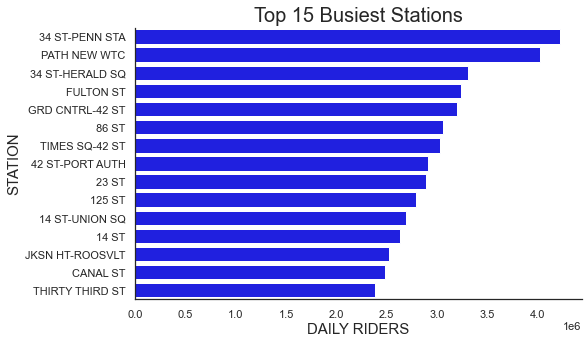

In [82]:
sns.set_style('white')
sns.set_context("notebook", rc={"font.size":20,"axes.titlesize":20,"axes.labelsize":15})
plt.figure(figsize=(8,5))

sns.barplot(data = Densely_Pop_Station.head(15),color="blue",
           x = 'DAILY_ENTRIES',
           y ='STATION').set(title = "Top 15 Busiest Stations",xlabel = 'DAILY RIDERS')

sns.despine();

Picked 6 of the top 15 Stations to see how the each STATION's DAILY_ENTRIES

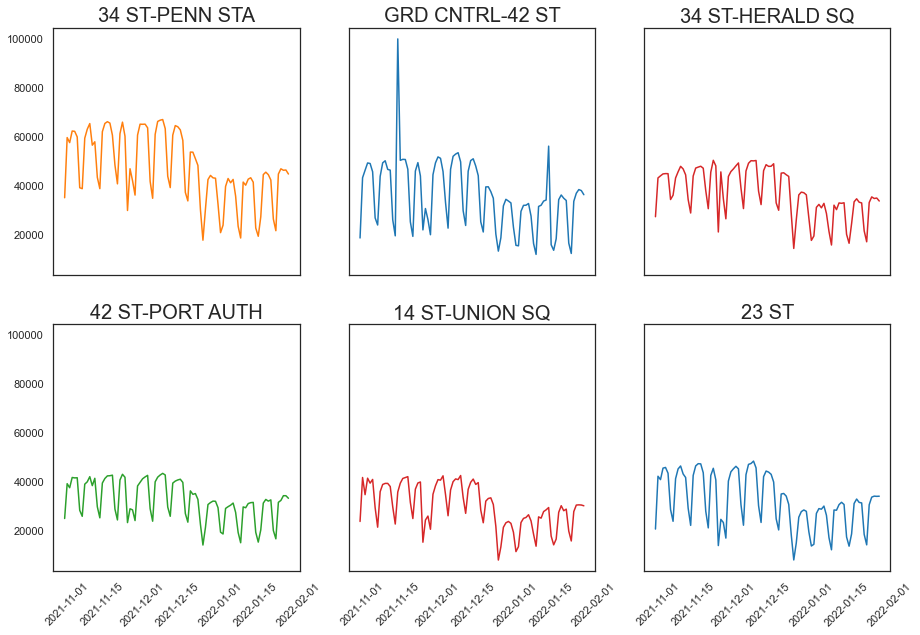

In [83]:

station_list = ['34 ST-PENN STA','GRD CNTRL-42 ST','34 ST-HERALD SQ',
                '42 ST-PORT AUTH','14 ST-UNION SQ','23 ST']
fig, ax = plt.subplots(2,3, figsize = (15,10),sharex = True,sharey = True)
#plt.ylim([25, 70000])

x = station_daily.loc[station_daily['STATION'] == station_list[0]].DATE2
y = station_daily.loc[station_daily['STATION'] == station_list[0]].DAILY_ENTRIES
#plt.gca().set_title(station_list[0])
#plt.xticks(rotation=45)
ax[0,0].plot(x,y,'tab:orange')
ax[0,0].set_title(station_list[0])
ax[0,0].tick_params(axis = "x", labelrotation = 45)

x = station_daily.loc[station_daily['STATION'] == station_list[1]].DATE2
y = station_daily.loc[station_daily['STATION'] == station_list[1]].DAILY_ENTRIES
#plt.gca().set_title(station_list[1])
#plt.xticks(rotation=45)
ax[0,1].plot(x,y,'tab:blue')
ax[0,1].set_title(station_list[1])
ax[0,1].tick_params(axis = "x", labelrotation = 45)

x = station_daily.loc[station_daily['STATION'] == station_list[2]].DATE2
y = station_daily.loc[station_daily['STATION'] == station_list[2]].DAILY_ENTRIES
#plt.gca().set_title(station_list[2])
#plt.xticks(rotation=45)
ax[0,2].plot(x,y,'tab:red')
ax[0,2].set_title(station_list[2])
ax[0,2].tick_params(axis = "x", labelrotation = 45)


x = station_daily.loc[station_daily['STATION'] == station_list[3]].DATE2
y = station_daily.loc[station_daily['STATION'] == station_list[3]].DAILY_ENTRIES
#plt.gca().set_title(station_list[3])
#plt.xticks(rotation=45)
ax[1,0].plot(x,y,'tab:green')
ax[1,0].set_title(station_list[3])
ax[1,0].tick_params(axis = "x", labelrotation = 45)

x = station_daily.loc[station_daily['STATION'] == station_list[4]].DATE2
y = station_daily.loc[station_daily['STATION'] == station_list[4]].DAILY_ENTRIES
#plt.gca().set_title(station_list[4])
#plt.xticks(rotation=45)
ax[1,1].plot(x,y,'tab:red')
ax[1,1].set_title(station_list[4])
ax[1,1].tick_params(axis = "x", labelrotation = 45)


x = station_daily.loc[station_daily['STATION'] == station_list[5]].DATE2
y = station_daily.loc[station_daily['STATION'] == station_list[5]].DAILY_ENTRIES
#plt.gca().set_title(station_list[5])
#plt.xticks(rotation=45)
ax[1,2].plot(x,y)
ax[1,2].set_title(station_list[5])
ax[1,2].tick_params(axis = "x", labelrotation = 45)

'''
def make_subplots(stn_list):
    fig, ax = plt.subplots(2, 3, figsize = (20, 15))
    for i,st in enumerate(stn_list):
        #fig, ax = plt.subplots(2, 3, sharex = True,sharey = True, figsize = (20, 15))
        station_data = station_daily.loc[station_daily['STATION'] == st]
        x = station_data.DATE2
        y = station_data.DAILY_ENTRIES
        plt.subplot(2, 3, i+1)
        plt.plot(x,y)
        plt.gca().set_title(st)
        plt.xticks(rotation=45)
    #for ax in fig.get_axes():
        #ax.label_outer() 
    return
make_subplots(station_list)
'''
plt.show()

Observations and Insights:

All the stations have similar drop in the Ridership during the months of December 2021 and January 2022

Grand Central station seems to be having a sudden spike in number of Riders around Nov 15th 2021 and January 1st 2022

In [84]:
station_daily = daily_df.groupby(["STATION", "DATE2"])[['DAILY_ENTRIES']].sum().reset_index()

In [85]:
station_by_date = station_daily.groupby(["DATE2"])[['DAILY_ENTRIES']].sum().reset_index()
station_by_date

,DATE2,DAILY_ENTRIES
0,2021-10-31,1931999.0
1,2021-11-01,2534842.0
2,2021-11-02,5199834.0
3,2021-11-03,2870895.0
4,2021-11-04,3836134.0
...,...,...
85,2022-01-24,2060697.0
86,2022-01-25,2704967.0
87,2022-01-26,2928334.0
88,2022-01-27,2196408.0


In [86]:
date_before = np.datetime64('2021-12-20')
date_during = np.datetime64('2022-01-15')



mean_before_wave = station_by_date[station_by_date['DATE2'] < date_before].mean()
print(mean_before_wave)

mean_during_wave = station_by_date[(station_by_date['DATE2'] > date_before) & (station_by_date['DATE2'] <= date_during)].mean()
print(mean_during_wave)

mean_after_wave = station_by_date[station_by_date['DATE2'] > date_during].mean()
print(mean_after_wave)

drop_percent = ((mean_before_wave-mean_during_wave)/mean_before_wave)*100
print(drop_percent)

inc_percent = ((mean_after_wave-mean_during_wave)/mean_during_wave)*100
print(inc_percent)

DAILY_ENTRIES    2597296.06
dtype: float64
DAILY_ENTRIES    1.891555e+06
dtype: float64
DAILY_ENTRIES    2031262.0
dtype: float64
DAILY_ENTRIES    27.172135
dtype: float64
DAILY_ENTRIES    7.385813
dtype: float64


<ipython-input-86-bdaf2c1659b2>:6: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_before_wave = station_by_date[station_by_date['DATE2'] < date_before].mean()
<ipython-input-86-bdaf2c1659b2>:9: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_during_wave = station_by_date[(station_by_date['DATE2'] > date_before) & (station_by_date['DATE2'] <= date_during)].mean()
<ipython-input-86-bdaf2c1659b2>:12: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  mean_after_wave = station_by_date[station_by_date['DATE2'] > date_during].mean()


Downloaded NY City's Covid Cases during the same period of time : Nov 2021, Dec 2021 and Jan 2022

In [87]:
nyc_df = pd.read_csv("/Users/archana/Downloads/COVID-19_Daily_Counts.csv")
nyc_df.drop(nyc_df.columns.difference(['DATE_OF_INTEREST','CASE_COUNT','probable_case_count']), 1, inplace=True)
nyc_df.columns = [column.strip() for column in nyc_df.columns]  
nyc_df.rename(columns = {'DATE_OF_INTEREST':'DATETIME','probable_case_count':'PROBABLE_CASES'}, inplace = True)
nyc_df.DATETIME = pd.to_datetime(nyc_df.DATETIME)
start_date = datetime.datetime(2021,11,1)
end_date = datetime.datetime(2022,1,31)

mask = (nyc_df['DATETIME'] >= start_date) & (nyc_df['DATETIME'] <= end_date)
cov_df = nyc_df.loc[mask]

In [88]:
cov_df

,DATETIME,CASE_COUNT,PROBABLE_CASES
611,2021-11-01,781,278
612,2021-11-02,805,239
613,2021-11-03,825,272
614,2021-11-04,907,259
615,2021-11-05,769,269
...,...,...,...
698,2022-01-27,3546,363
699,2022-01-28,2717,309
700,2022-01-29,501,68
701,2022-01-30,1429,223


For this analysis, I chose PROBABLE_CASES since PROBABLE_CASES was more accurately than CASE_COUNT as such.

In [89]:
merged_inner = pd.merge(left=station_by_date, right=cov_df, left_on='DATE2', right_on='DATETIME').drop(columns=['DATETIME','CASE_COUNT'])
merged_inner

,DATE2,DAILY_ENTRIES,PROBABLE_CASES
0,2021-11-01,2534842.0,278
1,2021-11-02,5199834.0,239
2,2021-11-03,2870895.0,272
3,2021-11-04,3836134.0,259
4,2021-11-05,2811591.0,269
...,...,...,...
84,2022-01-24,2060697.0,725
85,2022-01-25,2704967.0,489
86,2022-01-26,2928334.0,415
87,2022-01-27,2196408.0,363


This following visual shows both the number of Riders and number of Covid cases during the three month period - Nov 2021, Dec 2021 and Jan 2022

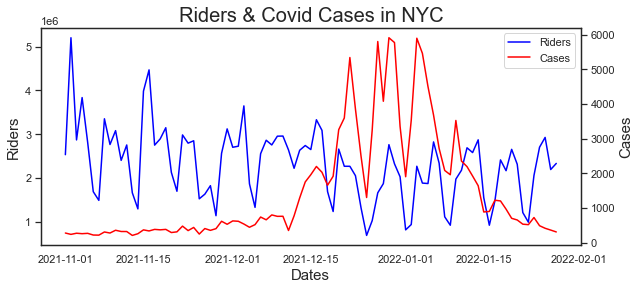

In [90]:
fig, host = plt.subplots()
fig.subplots_adjust(right=2,left=0.75)
par2 = host.twinx()


p1, = host.plot(merged_inner.DATE2,merged_inner.DAILY_ENTRIES, "b-", label="Riders")
p2, = par2.plot(merged_inner.DATE2, merged_inner.PROBABLE_CASES, "r-", label="Cases")

host.set_title('Riders & Covid Cases in NYC')
host.set_xlabel("Dates")
host.set_ylabel("Riders")
par2.set_ylabel("Cases")


lines = [p1, p2]
host.legend(lines, [l.get_label() for l in lines])

plt.show()

Observations and Insights:

We can observe that, as the Covid cases increased, the number of Riders using MTA decreased.
Even though the Covid cases decreased(towards end of Omicron wave), the number of Riders increased gradually.

The ideal time to distribute masks is when there is no wave or spike in the Covid cases. This will ensure that more number of people will have access to them and are likely to use.

Since there are fewer riders during the Covid spike, the quantity of mask disctribution in MTA stations can be reduced during that period and instead can be distributed in other places like medical facilities and Covid-testing centers.

